# Detection Malicicous Data

## preprocessing data

### read data

In [3]:
import pandas as pd 
import matplotlib.pyplot as plt 
from mpl_toolkits.mplot3d import Axes3D
import numpy as np


In [4]:
cols = [2,3,4,9,10,16] #id, xr ,yr, xt,yt, label
data = pd.read_csv("dataset/attack1withlabels.csv",usecols=cols)
data = data.dropna(axis=0, how="any")#remove invalid data
data_id = data.iloc[:,0]
pos_xr = data.iloc[:,1]
pos_yr = data.iloc[:,2]
pos_xt = data.iloc[:,3]
pos_yt = data.iloc[:,4]
label = data.iloc[:,5]


### colunm data
1. Type (3=BSM)
2. Time BSM was received by the receiver
3. Receiver ID
4. Receiver X position
5. Receiver Y position
6. Receiver Z position
7. Time BSM was transmitted
8. Transmitter ID
9. BSM ID
10. Transmitter X position
11. Transmitter Y position
12. Transmitter Z position
13. Transmitter X velocity
14. Transmitter Y velocity
15. Transmitter Z velocity
16. RSSI of received signal
17. Label (0=Normal Behavior)

In [5]:
# calculate distance between 2 point 
def cal_dis(x1,y1,x2,y2):
    return np.sqrt( np.square(x1-x2)+np.square(y1-y2) )

### display data

In [6]:
'''

index = 0
for i in range(10):
    x=[]
    y=[]
    attack = []
    a = data_id.values[index]
    count = data_id.value_counts()[a]
    tm = np.arange(0,count)
    for j in range(count):
        x.append(pos_xt[j+index])
        y.append(pos_yt[j+index])
        if(label[j+index]==1):
            attack.append([j,pos_xt[j+index],pos_y[j+index]])
    fig = plt.figure(i)
    ax = fig.add_subplot(111, projection = '3d')
    ax.scatter(tm,x,y,c='g')
    
    #transpose
    rez = []
    for row in attack :  
        rez = [[attack[j][i] for j in range(len(attack))] for i in range(len(attack[0]))]
    if(len(rez)==0):
        rez =[]
    else:
        ax.scatter(rez[0],rez[1],0,c='r',marker='v') # difficult to display the position of label =1, so we make y =0
                                                     # trianle is the postion of label =1 
    index = index + count
    plt.show()
'''


"\n\nindex = 0\nfor i in range(10):\n    x=[]\n    y=[]\n    attack = []\n    a = data_id.values[index]\n    count = data_id.value_counts()[a]\n    tm = np.arange(0,count)\n    for j in range(count):\n        x.append(pos_xt[j+index])\n        y.append(pos_yt[j+index])\n        if(label[j+index]==1):\n            attack.append([j,pos_xt[j+index],pos_y[j+index]])\n    fig = plt.figure(i)\n    ax = fig.add_subplot(111, projection = '3d')\n    ax.scatter(tm,x,y,c='g')\n    \n    #transpose\n    rez = []\n    for row in attack :  \n        rez = [[attack[j][i] for j in range(len(attack))] for i in range(len(attack[0]))]\n    if(len(rez)==0):\n        rez =[]\n    else:\n        ax.scatter(rez[0],rez[1],0,c='r',marker='v') # difficult to display the position of label =1, so we make y =0\n                                                     # trianle is the postion of label =1 \n    index = index + count\n    plt.show()\n"

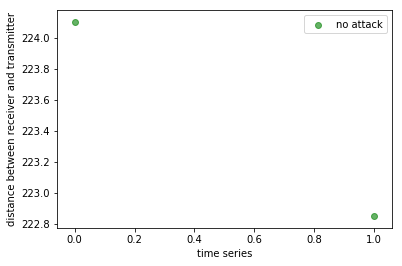

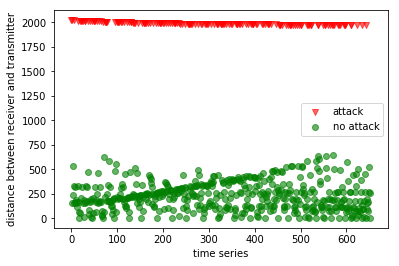

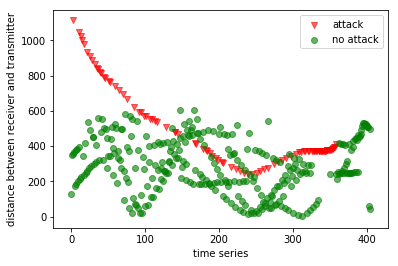

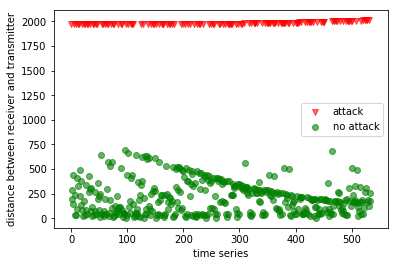

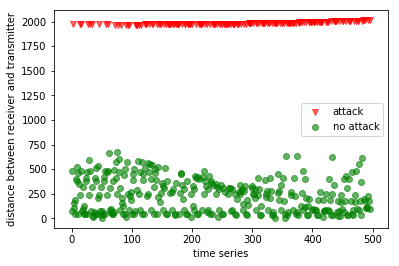

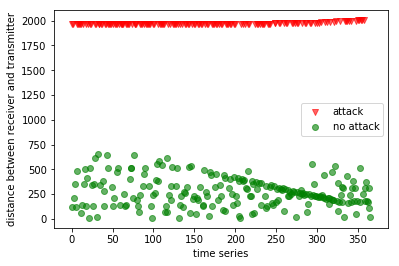

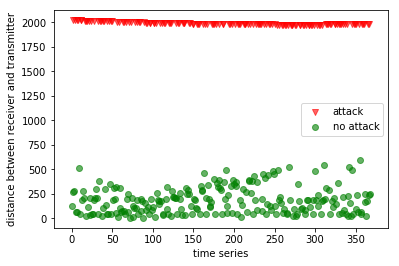

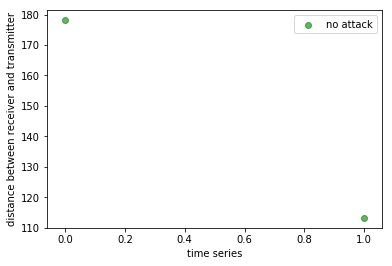

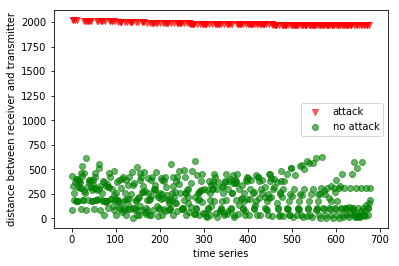

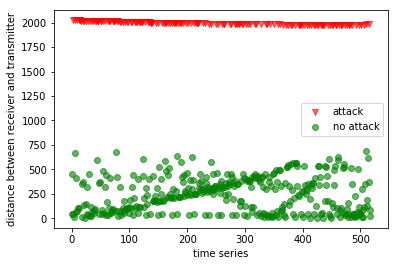

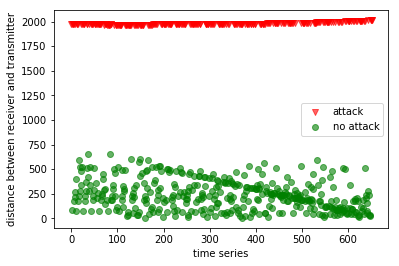

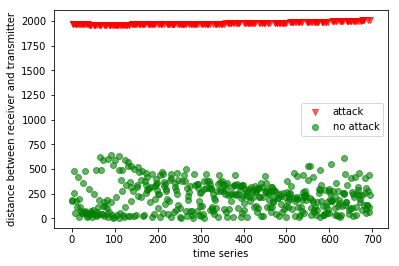

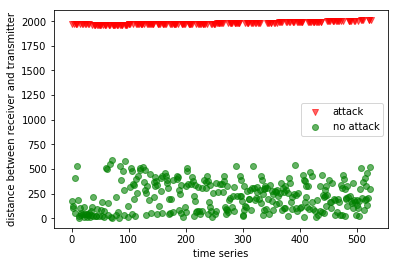

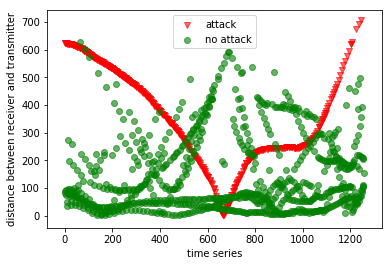

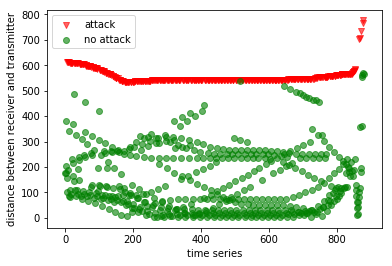

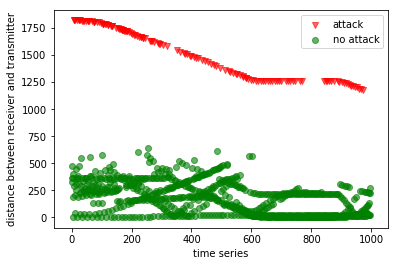

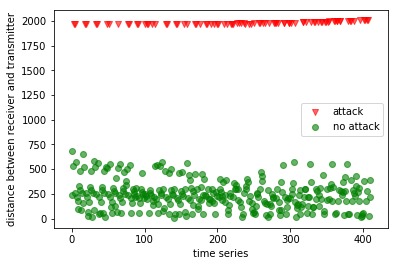

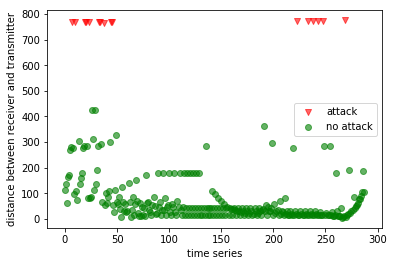

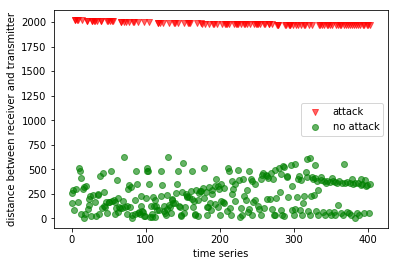

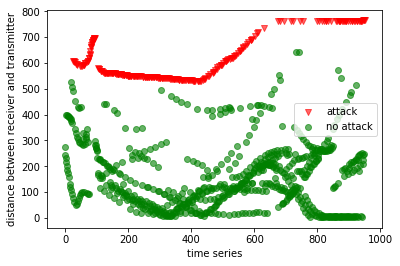

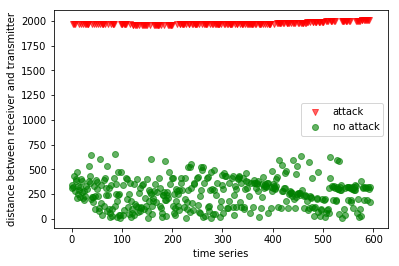

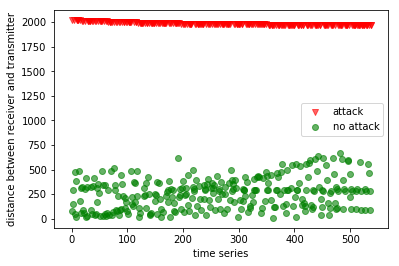

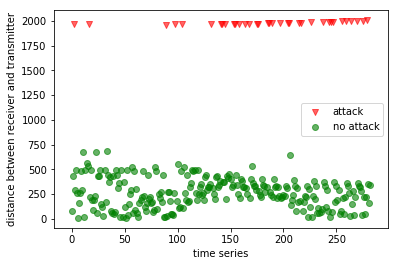

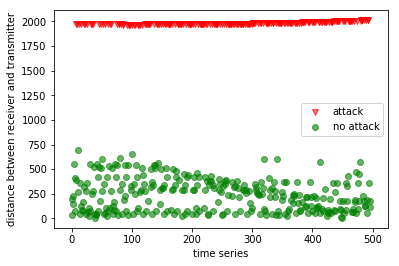

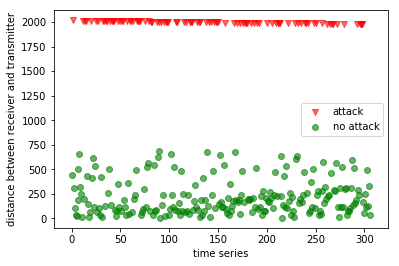

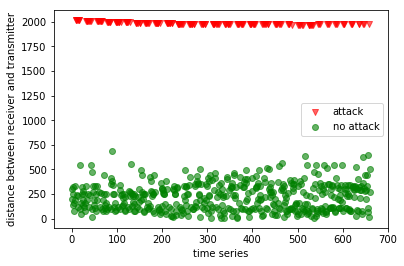

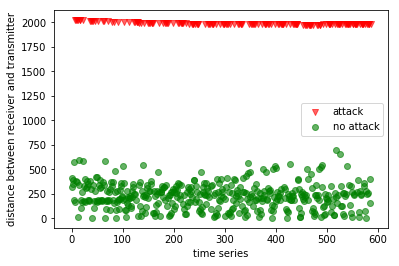

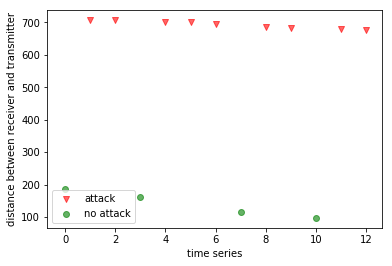

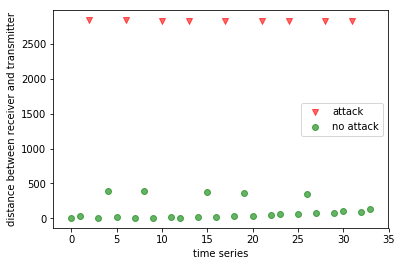

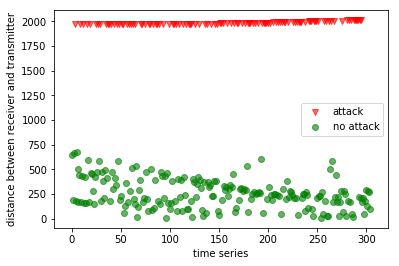

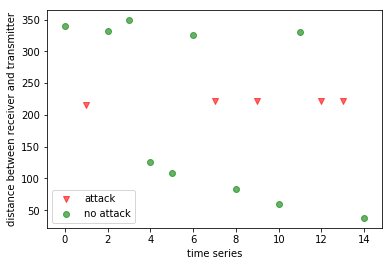

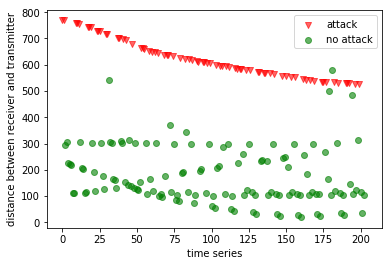

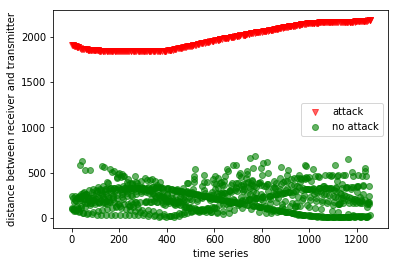

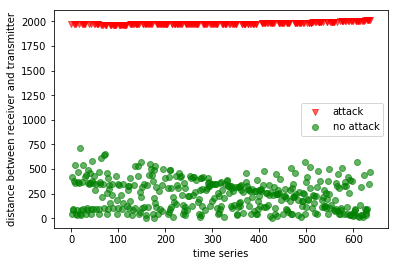

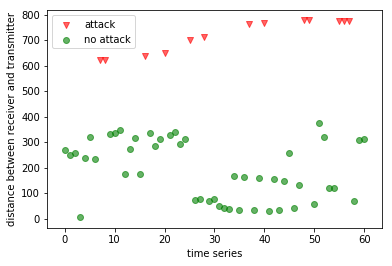

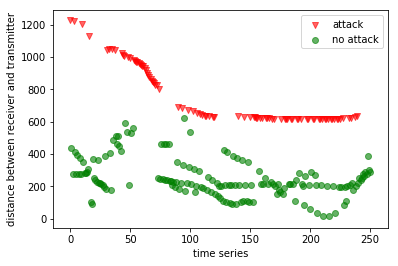

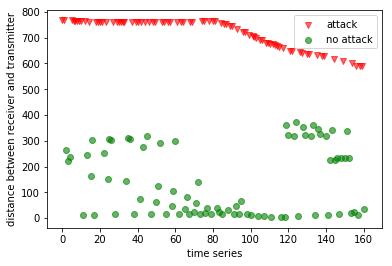

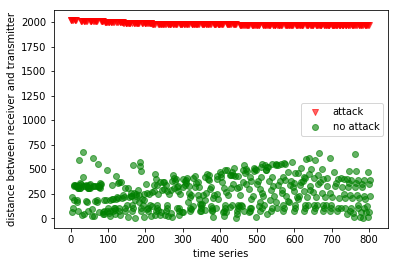

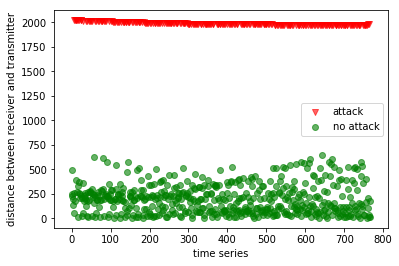

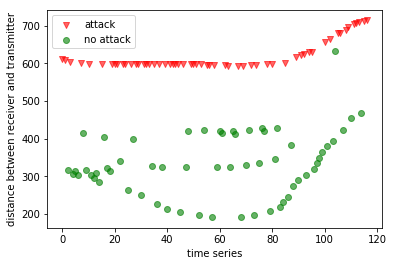

In [65]:
index = 0
for i in range(40): # for example , we take the case of id 0-40
    x=[]
    y=[]
    attack = []
    no_attack =[]
    a = data_id.values[index]
    count = data_id.value_counts()[a]
    tm = np.arange(0,count)
    for j in range(count):
        dis = cal_dis(pos_xr[j+index],pos_yr[j+index],pos_xt[j+index],pos_yt[j+index])
        if(label[j+index]==1):
            attack.append([j,dis])
        else: 
            no_attack.append([j,dis])
    #transpose
    attack_l = []
    no_attack_l =[]
    for row in attack :  
        attack_l= [[attack[j][i] for j in range(len(attack))] for i in range(len(attack[0]))]
    for row in no_attack:
        no_attack_l = [[no_attack[j][i] for j in range(len(no_attack))] for i in range(len(no_attack[0]))]
    
    index = index + count
    
    fig = plt.figure(i)    
    if(len(attack_l)==0):
        attack_l=[]
    else:
        plt.scatter(attack_l[0],attack_l[1],c='red',marker='v',alpha=0.6,label='attack')
    if(len(no_attack_l)==0):
        no_attack_l=[]
    else:
        plt.scatter(no_attack_l[0],no_attack_l[1],c="green",alpha=0.6,label="no attack")
    plt.xlabel("time series")
    plt.ylabel("distance between receiver and transmitter")
    plt.legend(loc="best")
    plt.show()
    
        

## impletation keras

In [8]:
from keras.models import Sequential
from keras.layers import Dense,Activation
from keras.layers.recurrent import LSTM
from sklearn import model_selection

In [9]:
# model implementation
model = Sequential()
#model.add(LSTM(32, input_shape=(None,5),return_sequences=False))
model.add(Dense(1,input_dim=5))
model.add(Dense(1,activation="sigmoid"))
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

AttributeError: module 'tensorflow' has no attribute 'get_default_graph'

In [199]:
# data input
cols = [2,3,4,9,10,16] #id, xr ,yr, xt,yt, label
data = pd.read_csv("dataset/attack1withlabels.csv",usecols=cols)
X = data.iloc[:,:5]
y = data.iloc[:,5]


In [205]:
# split data
#X_train, X_test,y_train,y_test = model_selection.train_test_split(X,y,test_size=0.2)
#can't use this model selection, it will break the seris
data_count = y.count()
data_rate = 0.8*data_count
data_rate = int(data_rate)
X_train = X.iloc[:data_rate,:]
y_train = y.iloc[:data_rate]
X_test = X.iloc[data_rate:,:]
y_test = y.iloc[data_rate:]
X_train.shape

#X_test = np.reshape(X_test,(X_test.shape[0],1,X_test.shape[1]))#timestep =1
#X_train = np.reshape(X_train, (X_train.shape[0], 1, X_train.shape[1]))


(340565, 5)

In [209]:
#fit data
model.fit(X_train,y_train,epochs=100,batch_size=100)

Epoch 1/100
340565/340565 [==============================] - 3s 8us/step - loss: 1.7853 - acc: 0.7281
Epoch 2/100
340565/340565 [==============================] - 2s 6us/step - loss: 0.3379 - acc: 0.8200
Epoch 3/100
340565/340565 [==============================] - 2s 6us/step - loss: 0.3259 - acc: 0.8454
Epoch 4/100
340565/340565 [==============================] - 2s 6us/step - loss: 0.3253 - acc: 0.8458
Epoch 5/100
340565/340565 [==============================] - 2s 6us/step - loss: 0.3243 - acc: 0.8466
Epoch 6/100
340565/340565 [==============================] - 2s 6us/step - loss: 0.3235 - acc: 0.8470
Epoch 7/100
340565/340565 [==============================] - 2s 6us/step - loss: 0.3233 - acc: 0.8467
Epoch 8/100
340565/340565 [==============================] - 2s 7us/step - loss: 0.3222 - acc: 0.8474
Epoch 9/100
340565/340565 [==============================] - 2s 7us/step - loss: 0.3218 - acc: 0.8475
Epoch 10/100
340565/340565 [==============================] - 2s 6us/step - loss: 

In [212]:
cost = model.evaluate(X_test,y_test,batch_size=100)
print('loss \n',cost[0])
print('accurency \n',cost[1])

85142/85142 [==============================] - 0s 3us/step
loss 
 0.256605000541
accurency 
 0.876488689519
